# K-Mean

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from clusterization import Clusterizator

## Iris flowers (demonstration using variables 0 and 2)

### Original clusters

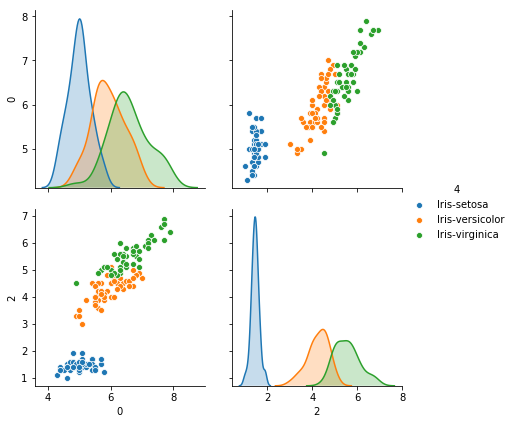

In [3]:
df = read_csv('iris.csv', header=None)
sns.pairplot(df,vars=[0,2],kind="scatter",hue=4,height=3)
plt.show()

### k-mean

#### plot

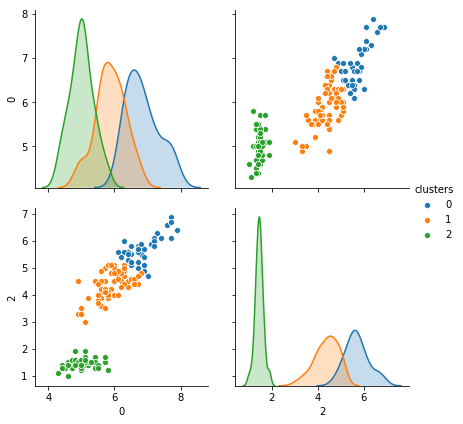

In [4]:
samples = df.iloc[:,:4].values
cluster_count = 3
cl = Clusterizator(cluster_count)
df['clusters'] = cl.k_mean(samples)
sns.pairplot(df,vars=[0,2],kind="scatter",hue='clusters',height=3)
plt.show()

#### accuracy

In [6]:
correct = 0
mapedClusters = dict(zip(df[4].unique(),df['clusters'].unique()))
for sample in df.values:
    if mapedClusters[sample[4]] == sample[5]:
        correct +=1
print('{0}%'.format((correct/len(df))*100))

44.666666666666664%


### k-mean-plus-plus (between variables 0 and 2)

#### first time

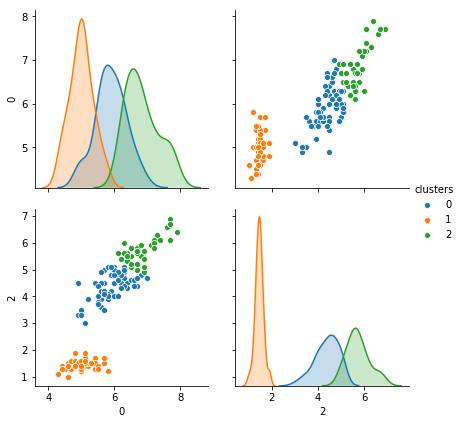

accuracy 89.33333333333333%


In [11]:
samples = df.iloc[:,:4].values
cluster_count = 3
cl = Clusterizator(cluster_count)
df['clusters'] = cl.k_mean_pp(samples)
sns.pairplot(df,vars=[0,2],kind="scatter",hue='clusters',height=3)
plt.show()
correct = 0
mapedClusters = dict(zip(df[4].unique(),df['clusters'].unique()))
for sample in df.values:
    if mapedClusters[sample[4]] == sample[5]:
        correct +=1
print('accuracy {0}%'.format((correct/len(df))*100))

#### second time

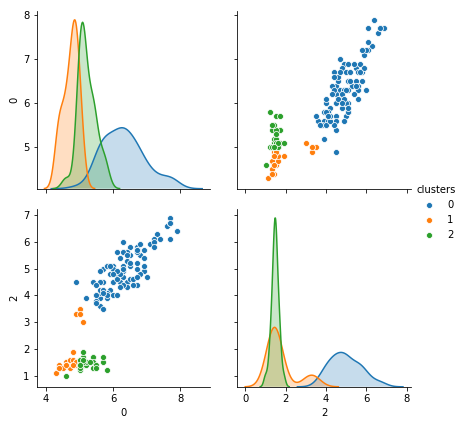

accuracy 56.00000000000001%


In [17]:
samples = df.iloc[:,:4].values
cluster_count = 3
cl = Clusterizator(cluster_count)
df['clusters'] = cl.k_mean_pp(samples)
sns.pairplot(df,vars=[0,2],kind="scatter",hue='clusters',height=3)
plt.show()
correct = 0
mapedClusters = dict(zip(df[4].unique(),df['clusters'].unique()))
for sample in df.values:
    if mapedClusters[sample[4]] == sample[5]:
        correct +=1
print('accuracy {0}%'.format((correct/len(df))*100))

## Image quantization

### With optimizaion using vecorization in k_mean_base method

#### Origin

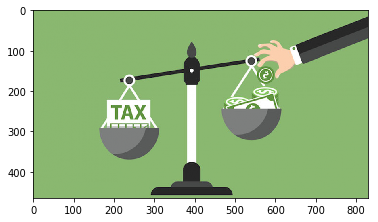

In [20]:
import imageio
import time
img = imageio.imread('img.png')
plt.imshow(img)
plt.show()

#### Quantitized

START:
STOP, time = 47.703086614608765


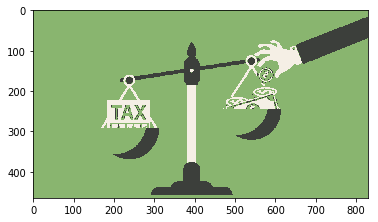

In [18]:
img = imageio.imread('img.png')
samples = np.reshape(img, (-1,3))
clusters_count = 3
clust = clusterization.Clusterizator(clusters_count)
start = time.time()
print("START:")
clusters = clust.k_mean_pp(samples)
print('STOP, time = {0}'.format(time.time() - start))
centroids = np.zeros((clusters_count,3))
counter_buffer = np.zeros(clusters_count)
centroids = [np.mean(samples[mask],axis=0) for mask in [cluster == clusters for cluster in range(clusters_count)]]
for i in range(len(samples)):
    samples[i] = centroids[clusters[i]]
plt.imshow(img)
plt.show()

## Final class that implements k-mean method

In [ ]:
import numpy as np

class Clusterizator:
    def __init__(self,clusters_count = 1):
        self.clusters_count = clusters_count
    
    def k_mean_pp(self,samples):
        rnd = int(np.random.uniform(0,len(samples),None))
        centroids = [samples[rnd]]
        for _ in range(1,self.clusters_count):
            propobilitys = np.array([self.__distance_to_closest_centroid(sample,centroids)**2 for sample in samples])
            propobilitys /= sum(propobilitys)
            rnd = int(np.random.choice(len(samples),p=propobilitys))
            centroids.append(samples[rnd].copy())
        return self.__k_mean_base(samples,np.array(centroids))
        
    def k_mean(self,samples):
        centroids = samples[:self.clusters_count,:].copy()
        return self.__k_mean_base(samples,centroids)

    def __k_mean_base(self,samples,centroids):
        # init:
        clusters_projection = []
        new_centroids = []
        # main cycle
        while True:
            # step 1: samples projection on clusters
            clusters_projection = np.argmin(self.__euclidean_norm(samples,centroids),axis=0)
            # step 2: new centroids calculating
            new_centroids = [np.mean(samples[mask],axis=0) for mask in [cluster == clusters_projection for cluster in range(self.clusters_count)]]
            # step 3:
            if np.equal(centroids, new_centroids).all():
                break
            centroids = new_centroids
        return clusters_projection

    def __euclidean_norm(self,samples, centroids):
        return np.array([np.sum(np.subtract(samples,centroid)**2,axis=1)**0.5 for centroid in centroids])
    
    def __distance_to_closest_centroid(self,sample,centroids):
        distance_buffer = np.empty(len(centroids))
        for j in range(len(centroids)):
                distance_buffer[j] = np.sqrt(sum((sample - centroids[j])**2))
        return distance_buffer.min()
